<a href="https://colab.research.google.com/github/khaos77/capacitacao-ia-e-iot/blob/main/9_Exerc%C3%ADcio_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Perceptron

In [ ]:
import numpy as np
class Perceptron:

  def __init__(self, teta, w, n, epochs):

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [ ]:
############ AND

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

############ OR

#y = np.array([0, 1, 1, 1])

In [ ]:
## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 2) Treinar o AND e depois fazer o predict com a matriz x
## 3) Treinar o OR e depois fazer o predict com a matriz x

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, teta, w, n, epochs):
        self.teta = teta  # threshold
        self.w = w        # weights
        self.n = n        # learning rate
        self.epochs = epochs  # number of training iterations

    def train_perceptron(self, train_x, train_y):
        for i in range(self.epochs):
            for j in range(len(train_x)):
                u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta  # Activation function
                y = 1 if u >= 0 else 0  # Output function
                erro = train_y[j] - y
                self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))
                self.teta = self.teta + (self.n * -1 * erro)

    def predict_perceptron(self, test_x):
        results = []
        for i in range(len(test_x)):
            u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta
            r = 1 if u >= 0 else 0
            results.append(r)
        return results

# AND operation
print("AND Operation:")
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Initialize perceptron for AND (weights and threshold to 0, learning rate 0.1, 10 epochs)
perceptron_and = Perceptron(teta=0, w=[0, 0], n=0.1, epochs=10)
perceptron_and.train_perceptron(x, y_and)
print("AND Predictions:", perceptron_and.predict_perceptron(x))

# OR operation
print("\nOR Operation:")
y_or = np.array([0, 1, 1, 1])

# Initialize perceptron for OR (weights and threshold to 0, learning rate 0.1, 10 epochs)
perceptron_or = Perceptron(teta=0, w=[0, 0], n=0.1, epochs=10)
perceptron_or.train_perceptron(x, y_or)
print("OR Predictions:", perceptron_or.predict_perceptron(x))

AND Operation:
AND Predictions: [0, 0, 0, 1]

OR Operation:
OR Predictions: [0, 1, 1, 1]


### Base de Classificação Sintética

In [2]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 5) Treinar o Perceptron
## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"

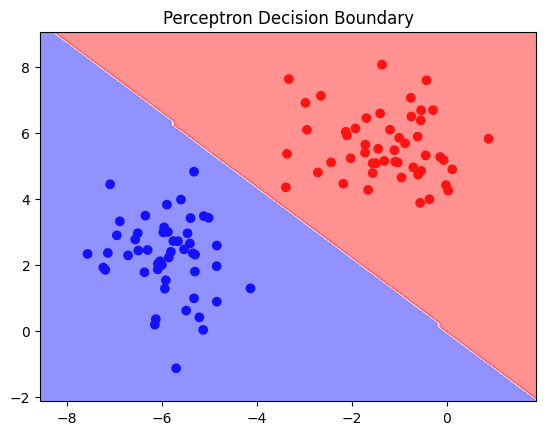

Final weights: [np.float64(0.3147289412903677), np.float64(0.28836711480161714)]
Final threshold: 0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class Perceptron:
    def __init__(self, teta, w, n, epochs):
        self.teta = teta  # threshold
        self.w = w        # weights
        self.n = n        # learning rate
        self.epochs = epochs  # number of training iterations

    def train_perceptron(self, train_x, train_y):
        for i in range(self.epochs):
            for j in range(len(train_x)):
                u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta
                y = 1 if u >= 0 else 0
                erro = train_y[j] - y
                self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))
                self.teta = self.teta + (self.n * -1 * erro)

    def predict_perceptron(self, test_x):
        results = []
        for i in range(len(test_x)):
            u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta
            r = 1 if u >= 0 else 0
            results.append(r)
        return results

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Generate dataset
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

# Initialize perceptron with random weights between -1 and 1
initial_weights = np.random.uniform(-1, 1, size=2)
perceptron = Perceptron(teta=0,
                       w=initial_weights,
                       n=0.1,  # learning rate
                       epochs=20)

# Train the perceptron
perceptron.train_perceptron(x, y)

# Plot the results
plot_linear_classifier(x, y, perceptron.w, perceptron.teta)

# Print final weights and threshold
print(f"Final weights: {perceptron.w}")
print(f"Final threshold: {perceptron.teta}")

In [5]:
from sklearn import metrics

## 7) Fazer o predict do Perceptron usando a matriz x
## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [6]:
# 7) Make predictions using the trained perceptron
y_pred = perceptron.predict_perceptron(x)

# 8) Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y, y_pred)
print(f"Perceptron Accuracy: {accuracy:.2f} ({(accuracy*100):.1f}%)")

Perceptron Accuracy: 1.00 (100.0%)


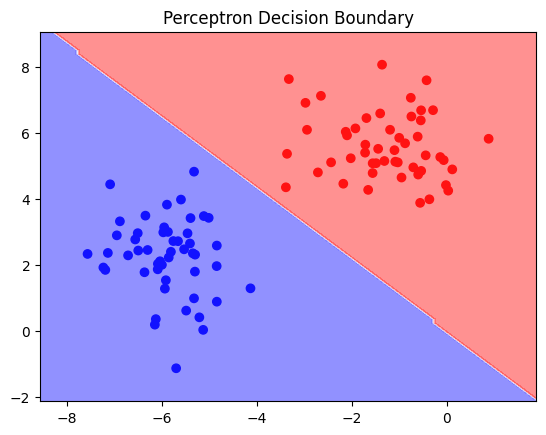

Perceptron Accuracy: 1.00 (100.0%)
Final weights: [np.float64(1.386629291531722), np.float64(1.2765042974487906)]
Final threshold: 0.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

class Perceptron:
    def __init__(self, teta, w, n, epochs):
        self.teta = teta
        self.w = w
        self.n = n
        self.epochs = epochs

    def train_perceptron(self, train_x, train_y):
        for i in range(self.epochs):
            for j in range(len(train_x)):
                u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta
                y = 1 if u >= 0 else 0
                erro = train_y[j] - y
                self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))
                self.teta = self.teta + (self.n * -1 * erro)

    def predict_perceptron(self, test_x):
        results = []
        for i in range(len(test_x)):
            u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta
            r = 1 if u >= 0 else 0
            results.append(r)
        return results

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')
    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)
    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Generate dataset
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

# Initialize and train perceptron
perceptron = Perceptron(teta=0,
                       w=np.random.uniform(-1, 1, size=2),
                       n=0.1,
                       epochs=20)
perceptron.train_perceptron(x, y)

# Plot results
plot_linear_classifier(x, y, perceptron.w, perceptron.teta)

# 7) Make predictions
y_pred = perceptron.predict_perceptron(x)

# 8) Calculate and print accuracy
accuracy = metrics.accuracy_score(y, y_pred)
print(f"Perceptron Accuracy: {accuracy:.2f} ({(accuracy*100):.1f}%)")
print(f"Final weights: {perceptron.w}")
print(f"Final threshold: {perceptron.teta}")

### Dataset Sintético

(-0.1, 1.1)

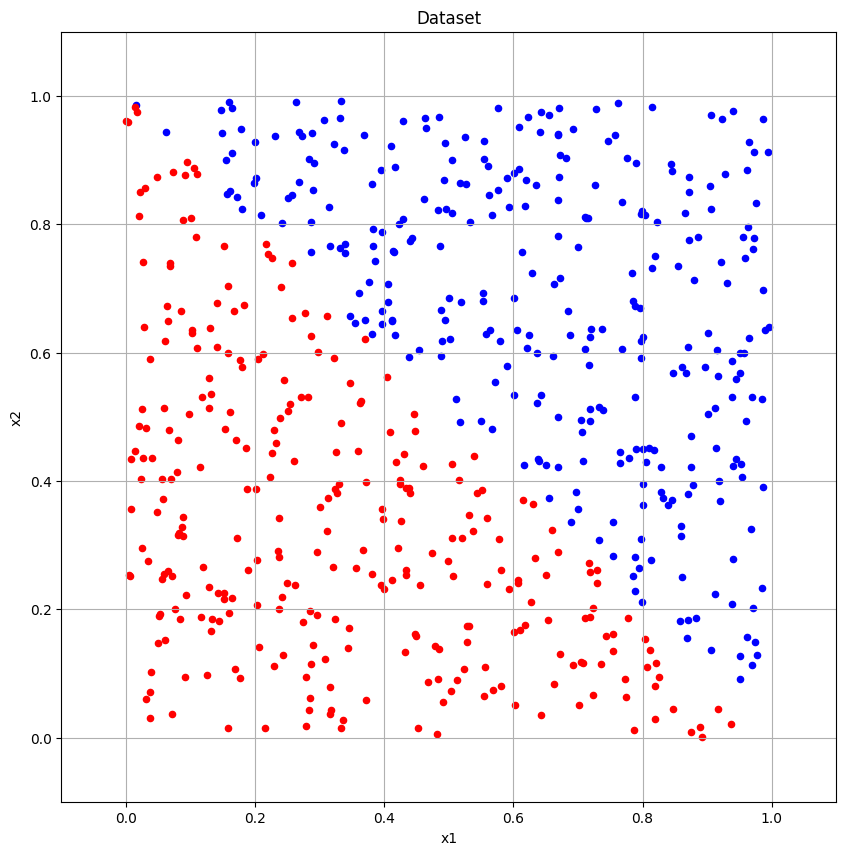

In [8]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))



#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [9]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

In [10]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
## 10) Inicializar o Perceptron com os parâmetros necessários
## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
## 12) Treinar o perceptron

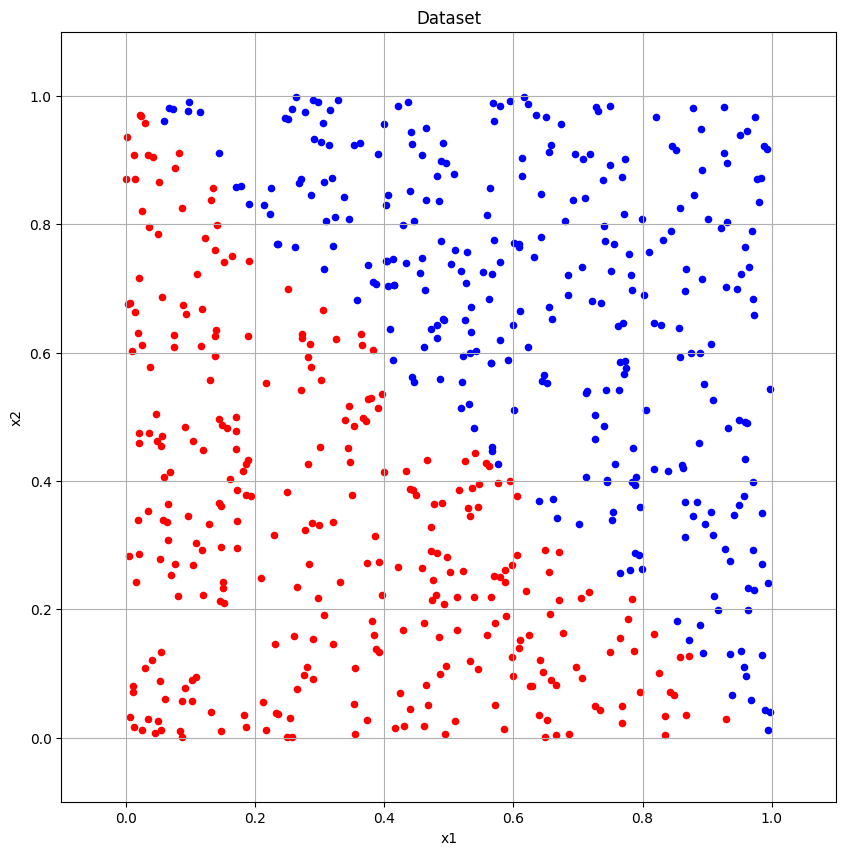

Test Accuracy: 0.96 (96.1%)
Final weights: [np.float64(2.0458103295718386), np.float64(2.0440272121560854)]
Final threshold: 2.0000000000000004


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create synthetic dataset
df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

# Define target function
def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

# Plot the dataset
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
plt.show()

# Prepare data
y = df['y']
X = df.loc[:, 'x1':'x2']

# 9) Split data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 10) Initialize Perceptron with parameters
perceptron = Perceptron(teta=0,               # threshold
                       w=[0.5, -0.5],         # initial weights
                       n=0.1,                 # learning rate
                       epochs=100)            # training iterations

# 11) Convert datasets to lists
train_x = X_train.values.tolist()
train_y = y_train.values.tolist()
test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

# 12) Train the perceptron
perceptron.train_perceptron(train_x, train_y)

# Make predictions on test set
y_pred = perceptron.predict_perceptron(test_x)

# Calculate accuracy
accuracy = metrics.accuracy_score(test_y, y_pred)
print(f"Test Accuracy: {accuracy:.2f} ({(accuracy*100):.1f}%)")
print(f"Final weights: {perceptron.w}")
print(f"Final threshold: {perceptron.teta}")

In [12]:
from sklearn import metrics

## 13) Fazer o predict do Perceptron usando a matriz x
## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [13]:
from sklearn import metrics

# 13) Fazer previsões com o Perceptron treinado
y_pred = perceptron.predict_perceptron(test_x)  # Usando o conjunto de teste

# 14) Calcular e mostrar a acurácia
accuracy = metrics.accuracy_score(test_y, y_pred)
print("\nResultados da Avaliação:")
print(f"Acurácia do Perceptron: {accuracy:.4f} ({(accuracy*100):.2f}%)")

# Mostrar alguns exemplos de previsões
print("\nExemplos de previsões (5 primeiras amostras):")
print(f"Valores reais:    {test_y[:5]}")
print(f"Valores previstos: {y_pred[:5]}")

# Opcional: Mostrar a matriz de confusão
print("\nMatriz de Confusão:")
print(metrics.confusion_matrix(test_y, y_pred))


Resultados da Avaliação:
Acurácia do Perceptron: 0.9611 (96.11%)

Exemplos de previsões (5 primeiras amostras):
Valores reais:    [0, 0, 0, 1, 0]
Valores previstos: [0, 0, 0, 1, 0]

Matriz de Confusão:
[[88  7]
 [ 0 85]]
